In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('car_details_ford_focus.csv')

In [2]:
# Data Pre-processing is (also called data cleaning or data wrangling)

# Converting or mapping data from inital raw form into another format to prepare the data further analysis.
# - Identify and handle missing values
# - Data Formatting
# - Data Normalization (centering / scaling)
# - Data binning
# - Turning categorical values to numeric variables

In [3]:
# Accessing : df['price']
# Modifying (Adds 10000 to every value ): df['price'] = df['price'] + 10000

In [4]:
# Missing Values

# Could be represented as ?,N/A,0 or just a blank cell
# Replacing is better than dropping
# Replace it with an average ( of similar datapoints)
# if it's categorical then repalce it by frequency
# or replace it based on other functions
# or just leave it as missing data

In [49]:
missing_data = df.isnull()
notnull_data = df.notnull()

In [57]:
# Dropping
df.dropna(subset=["price"], axis=0, inplace=True) # axis 0 for row, 1 for column. inplace->directly modification on dataset.
df.reset_index(drop=True, inplace=True) # Reset after dropping

In [10]:
# Replacing
mean_price = df["price"].mean()
mean_price

81.66649576783556

In [12]:
df["price"].replace(np.nan, mean_price)

0       61.75
1       96.95
2       86.90
3       52.90
4       37.90
        ...  
822     50.50
823     41.00
824    107.00
825     74.00
826    118.50
Name: price, Length: 827, dtype: float64

In [27]:
# Data Formatting

# Non-formatted is confusing, hard to aggregate, and hard to compare
# our price is float64. Let's convert it to Int64
df["price"]

0       61.75
1       96.95
2       86.90
3       52.90
4       37.90
        ...  
822     50.50
823     41.00
824    107.00
825     74.00
826    118.50
Name: price, Length: 827, dtype: float64

In [40]:
df["price"] = df["price"] * 1000
df["price"] = df["price"].astype("int")
df["price"]

0       61750
1       96950
2       86900
3       52900
4       37900
        ...  
822     50500
823     41000
824    107000
825     74000
826    118500
Name: price, Length: 827, dtype: int32

In [31]:
# Data Normalization

# Normalize values with different(too big) ranges
# Age is 20 and income is 100000 too much. So income can influence more
# After normalization : Age : 0.2, income : 0.15. So similar intrinsic influence
# Approaches :
# - new = old / max -> simple feature scaling = 0<x<1
# - new = old - min / max - min -> Min-Max = 0<x<1
# - new = old - mean / standartDeviation -> Z-score = -3<x<3 but can be lower or higher

In [41]:
# Z-score
df["price"] = (df["price"] - df["price"].mean()) / df["price"].std()
df["price"]

0     -0.639565
1      0.490789
2      0.168060
3     -0.923759
4     -1.405445
         ...   
822   -1.000829
823   -1.305896
824    0.813518
825   -0.246189
826    1.182810
Name: price, Length: 827, dtype: float64

In [33]:
# Binning

# - Groping of values into bins
# - Converts numeric into categorical variables
# - Group a set of numerical valeus into a set of bins
# - price : 5000 - 25000 = low, 25000 - 55000 = mid, 50000 - 200000 = high
# - to have a better representation of price

In [42]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4) # We need 3 bins so we need 4 dividers
bins

array([-1.81969372,  0.04014599,  1.8999857 ,  3.7598254 ])

In [43]:
group_names = ["Low", "Medium", "High"]
# pd.cut for what each value of price belongs to.
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)
df["price-binned"]

0         Low
1      Medium
2      Medium
3         Low
4         Low
        ...  
822       Low
823       Low
824    Medium
825       Low
826    Medium
Name: price-binned, Length: 827, dtype: category
Categories (3, object): [Low < Medium < High]

In [54]:
df["price-binned"].value_counts()
# to use on missing data
#for column in missing_data.columns.values.tolist():
#    print(column)
#    print (missing_data[column].value_counts())
#    print("")   

Low       430
Medium    374
High       23
Name: price-binned, dtype: int64

In [56]:
# You can replace NaNs with most used value 
df["price-binned"].value_counts().idxmax()

'Low'

Text(0.5, 1.0, 'Price Bins')

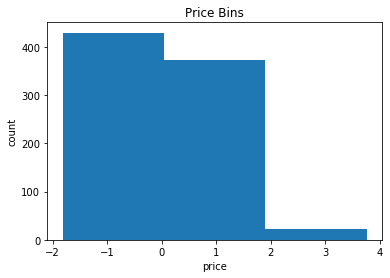

In [62]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

plt.pyplot.hist(df["price"], bins=3)

plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price Bins")

In [45]:
# Categorical Variables

# - Most statistical models cannot take in the objects/strings as input
# - Called as One-hot encoding

In [65]:
dummy_features = pd.get_dummies(df['fuel'])
dummy_features.head()

,benzin,benzin & lpg,dizel
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [66]:
dummy_features.rename(columns={'benzin':'fuel-gas','benzin & lpg':'fuel-lpg','dizel':'fuel-diesel'}, inplace=True)
dummy_features.head()

,fuel-gas,fuel-lpg,fuel-diesel
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [67]:
# merge dummy_features
df = pd.concat([df, dummy_features], axis=1)
# drop original field fuel
df.drop("fuel", axis=1, inplace=True)

In [68]:
# correct object types, maybe km ?
df.dtypes

id                 int64
date              object
brand             object
serie             object
model             object
year               int64
transmission      object
km               float64
type              object
hp                 int64
cc                 int64
traction          object
color             object
guarantee         object
Nation            object
from_whome        object
change            object
status            object
price            float64
city              object
county            object
neighborhood      object
binned-price    category
fuel-gas           uint8
fuel-lpg           uint8
fuel-diesel        uint8
dtype: object

In [61]:
df.rename(columns={'price-binned':'binned-price'}, inplace=True)